In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random





df = pd.read_csv('loan_cleaned_data.csv' , encoding='latin-1')
df.head()


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Not Verified,Source Verified,Verified,36 months,60 months,A,B,C,D,E,F,G,MORTGAGE,NONE,OTHER,OWN,RENT,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,n/a,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,5000,5000,4975.0,10.65,162.87,24.000,0,27.65,0,1,3,0,13648,83.7,9,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,15.27,59.83,30.000,1,1.00,0,5,3,0,1687,9.4,4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,0,8.72,0,2,2,0,2956,98.5,10,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5000,5000,5000.0,7.90,156.46,36.000,0,11.20,0,3,9,0,7963,28.3,12,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3000,3000,3000.0,18.64,109.43,48.000,0,5.35,0,2,4,0,8221,87.5,4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random

In [3]:
Y = df['loan_status']


In [4]:
X = df.drop(['loan_status'], 1)
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Not Verified,Source Verified,Verified,36 months,60 months,A,B,C,D,E,F,G,MORTGAGE,NONE,OTHER,OWN,RENT,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,n/a,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,5000,5000,4975.0,10.65,162.87,24.000,27.65,0,1,3,0,13648,83.7,9,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,15.27,59.83,30.000,1.00,0,5,3,0,1687,9.4,4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,8.72,0,2,2,0,2956,98.5,10,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5000,5000,5000.0,7.90,156.46,36.000,11.20,0,3,9,0,7963,28.3,12,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3000,3000,3000.0,18.64,109.43,48.000,5.35,0,2,4,0,8221,87.5,4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.76970702, -0.76383578, -0.6946393 , ..., -0.19253329,
        -0.10688605, -0.14953263],
       [-1.10821845, -1.1138348 , -1.04233215, ..., -0.19253329,
        -0.10688605, -0.14953263],
       [-1.12175891, -1.12783476, -1.05638035, ...,  5.19390703,
        -0.10688605, -0.14953263],
       ..., 
       [-0.09268415, -0.06383774, -1.34436837, ..., -0.19253329,
        -0.10688605, -0.14953263],
       [-1.17592074, -1.1838346 , -1.21442255, ..., -0.19253329,
        -0.10688605, -0.14953263],
       [-0.85094977, -0.84783554, -1.19686231, ..., -0.19253329,
        -0.10688605, -0.14953263]])

In [6]:
np.any(np.isnan(X_scaled))

False

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


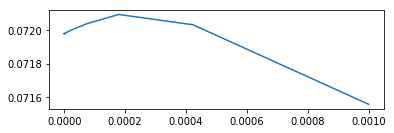

In [7]:
# Randomly split data into training/testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_scaled, Y, test_size=0.2, random_state=1)


plt.subplot(2, 1, 1)
# Create linear regression object
alphas = np.logspace(-40, -3, 100)
from sklearn.linear_model import Lasso
scores = []

for alpha in alphas:
    regr = Lasso(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
plt.plot(alphas,scores)

In [8]:
best_alpha=alphas[np.argmax(scores)]
best_alpha

0.0001788649529057435

In [ ]:
regr2 = Lasso(alpha=best_alpha)
regr2.fit(X_train,y_train)
regr2.coef_

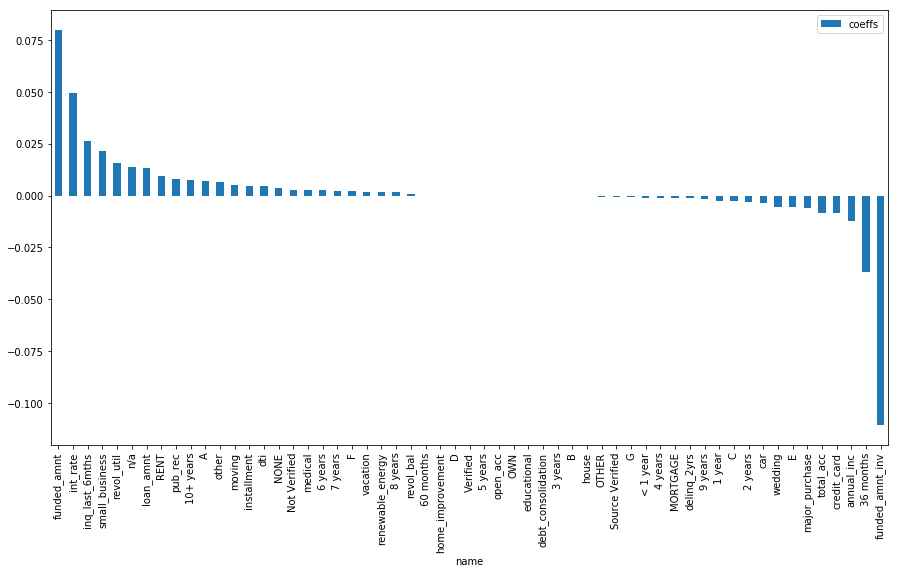

In [10]:
df_coeffs = pd.DataFrame({'coeffs':regr2.coef_, 'name':pd.DataFrame(X).columns.values})
df_coeffs=df_coeffs.sort_values(['coeffs'])
df_coeffs[::-1].plot(x='name',y='coeffs',kind='bar',figsize=(15,8))

plt.show()

In [11]:
# Data cleaning part 2 - drop insignificant coefficients

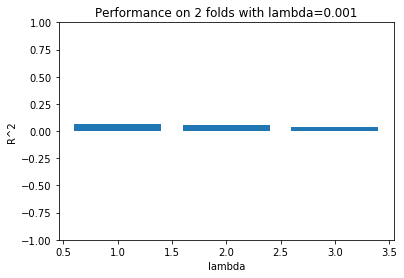

In [67]:
from sklearn.model_selection import cross_val_score
regr3 = Lasso(alpha=best_alpha)
scores3 = cross_val_score(regr3, X_scaled, Y, cv=3)
plt.ylim([-1,1])
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 2 folds with lambda=' + str(alpha))
plt.bar(range(1,4),scores3)
plt.show()

In [63]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,Y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(Y),n_folds=3,shuffle=True, random_state = 42)
    Y_pred = Y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        Y_train = Y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,Y_train)
        Y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs


coeffs=run_cv_coeffs(X_scaled,np.array(Y),Lasso,alpha=best_alpha)

In [64]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i]+ coeffs[2][i])/3 for i in range(0,len(pd.DataFrame(X_scaled).columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i]]) for i in range(0,len(pd.DataFrame(X_scaled).columns))]
    return coeffs_avgd, coeffs_std
coeffs_avgd,coeffs_std=get_coeffs(coeffs)

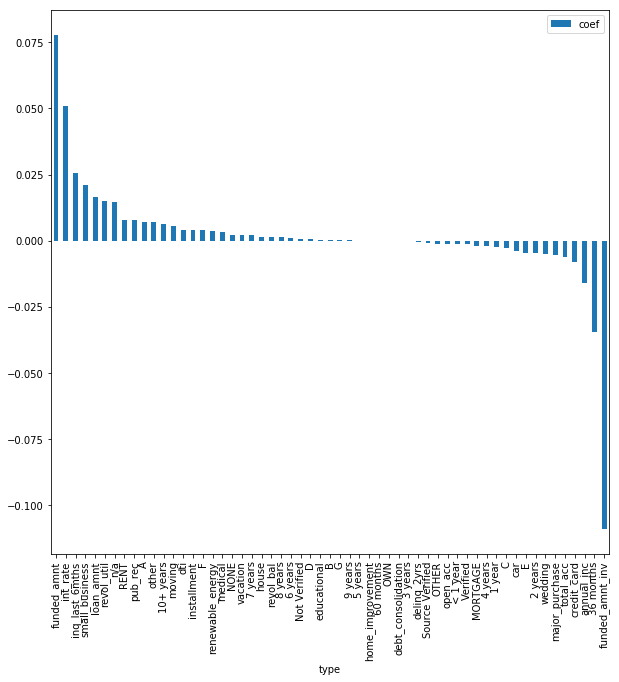

In [65]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avgd, 'std':coeffs_std})
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',figsize=(10,10))